In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from tensorflow.keras.applications import VGG16, InceptionResNetV2
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax


In [2]:
train_dir = "../archive/train" #passing the path with training images
test_dir = "../archive/test"   #passing the path with testing images
img_size = 48 #original size of the image

In [3]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(#rotation_range = 180,
                                         width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         horizontal_flip = True,
                                         rescale = 1./255,
                                         #zoom_range = 0.2,
                                         validation_split = 0.2
                                        )
validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,
                                         validation_split = 0.2)


test_datagen  = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)



In [4]:
train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (img_size,img_size),
                                                    batch_size = 64,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical",
                                                    subset = "training"
                                                   )
validation_generator = validation_datagen.flow_from_directory( directory = train_dir,
                                                              target_size = (img_size,img_size),
                                                              batch_size = 64,
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical",
                                                              subset = "validation"
                                                             )
test_generator = test_datagen.flow_from_directory(directory = test_dir,
                                                  target_size = (img_size,img_size),
                                                  color_mode = "grayscale",
                                                  class_mode = 'categorical',
                                                  batch_size = 64)

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [6]:
# 定义模型
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=64, kernel_size=[3, 3], padding="same", activation=tf.nn.relu, input_shape=[48, 48, 1]),
    tf.keras.layers.MaxPooling2D(pool_size=[2, 2], strides=2),
    tf.keras.layers.Conv2D(filters=128, kernel_size=[3, 3], padding="same", activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D(pool_size=[2, 2], strides=2),
    tf.keras.layers.Conv2D(filters=256, kernel_size=[3, 3], padding="same", activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D(pool_size=[2, 2], strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(units=256, activation=tf.nn.relu),
    tf.keras.layers.Dense(units=7)
])


# 编译模型
model.compile(optimizer='adam', loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])


model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 48, 48, 64)        640       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 128)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 256)       295168    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 256)       

In [7]:
epochs = 100
batch_size = 64
history = model.fit(x = train_generator,epochs = epochs,validation_data = validation_generator)

Epoch 1/100
359/359 [==============================] - 25s 52ms/step - loss: 7.6580 - accuracy: 0.2341 - val_loss: 10.9185 - val_accuracy: 0.2513
Epoch 2/100
359/359 [==============================] - 13s 35ms/step - loss: 7.7931 - accuracy: 0.2339 - val_loss: 5.1996 - val_accuracy: 0.2513
Epoch 3/100
359/359 [==============================] - 12s 33ms/step - loss: 6.5678 - accuracy: 0.2339 - val_loss: 5.1996 - val_accuracy: 0.2513
Epoch 4/100
359/359 [==============================] - 12s 33ms/step - loss: 6.4064 - accuracy: 0.2356 - val_loss: 5.1996 - val_accuracy: 0.2513
Epoch 5/100
359/359 [==============================] - 12s 33ms/step - loss: 6.4829 - accuracy: 0.2339 - val_loss: 5.1996 - val_accuracy: 0.2513
Epoch 6/100
105/359 [=======>......................] - ETA: 7s - loss: 6.4520 - accuracy: 0.2287

KeyboardInterrupt: 

In [12]:
model.save_weights('weights/weight3')

In [6]:
model.load_weights('weights/weight3')

In [9]:
# new
loss1, acc1 = model.evaluate(train_generator)
print("train loss:", loss1, "train accuracy:", acc1)
loss2, acc2 = model.evaluate(validation_generator)
print("validation loss:", loss2, "validation accuracy:", acc2)
loss3, acc3 = model.evaluate(test_generator)
print("test loss:", loss3, "test accuracy:", acc3)

359/359 [==============================] - 11s 31ms/step - loss: 0.9051 - accuracy: 0.8698
train loss: 0.9050920605659485 train accuracy: 0.8698188662528992
90/90 [==============================] - 2s 19ms/step - loss: 1.5487 - accuracy: 0.6713
validation loss: 1.5487381219863892 validation accuracy: 0.671311616897583
113/113 [==============================] - 2s 19ms/step - loss: 1.5235 - accuracy: 0.6817
test loss: 1.5234959125518799 test accuracy: 0.6816661953926086


In [11]:
# old
loss1, acc1 = model.evaluate(train_generator)
print("train loss:", loss1, "train accuracy:", acc1)
loss2, acc2 = model.evaluate(validation_generator)
print("validation loss:", loss2, "validation accuracy:", acc2)
loss3, acc3 = model.evaluate(test_generator)
print("test loss:", loss3, "test accuracy:", acc3)

359/359 [==============================] - 11s 31ms/step - loss: 0.9086 - accuracy: 0.8691
train loss: 0.9086290001869202 train accuracy: 0.8691222667694092
90/90 [==============================] - 2s 18ms/step - loss: 1.5487 - accuracy: 0.6713
validation loss: 1.5487405061721802 validation accuracy: 0.671311616897583
113/113 [==============================] - 2s 17ms/step - loss: 1.5235 - accuracy: 0.6817
test loss: 1.5234951972961426 test accuracy: 0.6816661953926086


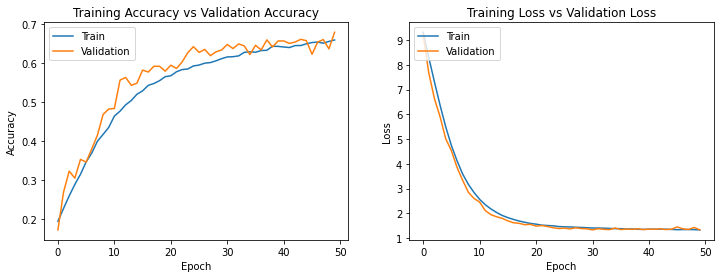

In [ ]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()